# 1 Basic Histogram Equalization

In this part, we implement the HE algo and apply it to 8 black-white images

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# histogram equalization algorithm for basic pictures
def histEqAlgo(imgArr):
    hist, bins = np.histogram(imgArr, 255)
    cdf = np.cumsum(hist)
    cdf = 255 * (cdf / cdf[-1])  # mapping
    res = np.interp(imgArr.flatten(), bins[:-1], cdf)
    res = res.reshape(imgArr.shape)
    return Image.fromarray(res)

## Transform images from RGB to Grey scale

In [3]:
for i in range(1, 9):
    Path = "../images/original images/sample0" + str(i) + ".jpg"
    img = Image.open(Path)
    img = img.convert("L")
    img.save("../images/gray images/gray_sample0" + str(i) + ".jpg")

## Apply the HE algo to gray images and save

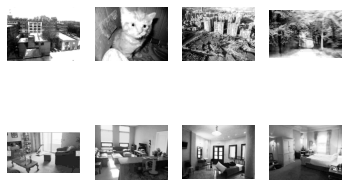

In [4]:
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.axis("off")
    img = Image.open("../images/gray images/gray_sample0" + str(i) + ".jpg")
    gray_arr = np.array(img.convert('L'))
    image = histEqAlgo(gray_arr)
    plt.imshow(image)
    image = image.convert('RGB')
    image.save("../images/gray images/gray_res" + str(i) + ".jpg")

## Compare histograms of probability between gray samples and gray results

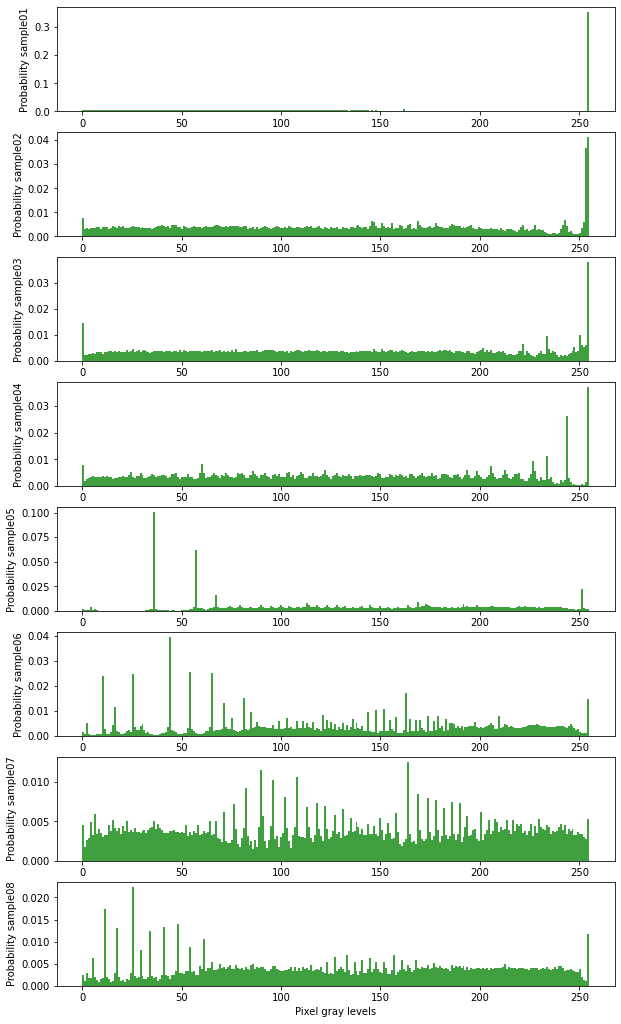

In [5]:
plt.figure(figsize=(10, 18))
for i in range(1, 9):
    Path = '../images/gray images/gray_res' + str(i) + '.jpg'
    plt.subplot(8, 1, i)
    src = Image.open(Path)
    arr = (np.array(src)).flatten()
    plt.hist(arr, bins=256, density=True, facecolor='green', alpha=0.75)
    plt.xlabel("Pixel gray levels")
    plt.ylabel("Probability sample0" + str(i))
plt.savefig("../gray_HE_samples_histogram.jpg")
plt.show()

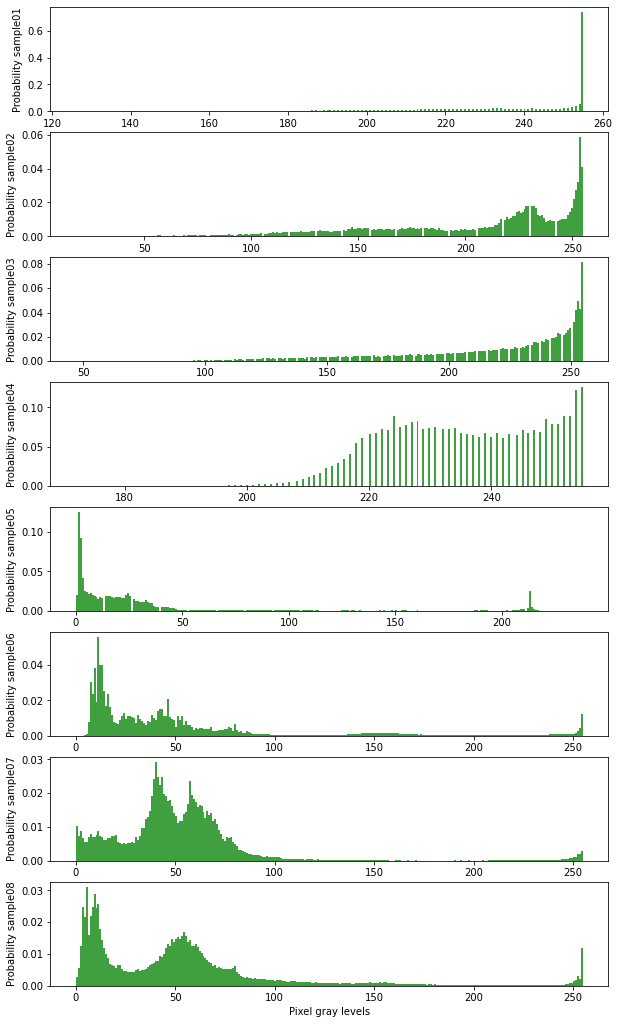

In [6]:
plt.figure(figsize=(10, 18))
for i in range(1, 9):
    Path = '../images/gray images/gray_sample0' + str(i) + '.jpg'
    plt.subplot(8, 1, i)
    src = Image.open(Path)
    arr = (np.array(src)).flatten()
    plt.hist(arr, bins=256, density=True, facecolor='green', alpha=0.75)
    plt.xlabel("Pixel gray levels")
    plt.ylabel("Probability sample0" + str(i))
plt.savefig("../gray_samples_histogram.jpg")
plt.show()

# 2 HE algo for 3 channels RGB

In [7]:
# histogram equalization algorithm every channel for Colorful pictures
def RGB_histEqAlgo2(imgArr):
    imgArr = np.array(imgArr)
    arrR = imgArr[..., 0]
    arrG = imgArr[..., 1]
    arrB = imgArr[..., 2]

    resR = histEqAlgo(arrR)
    resG = histEqAlgo(arrG)
    resB = histEqAlgo(arrB)

    new_imgArr = np.zeros(imgArr.shape, dtype='uint8')
    new_imgArr[..., 0] = resR
    new_imgArr[..., 1] = resG
    new_imgArr[..., 2] = resB

    return Image.fromarray(new_imgArr, mode='RGB')

## Apply the HE algo 'RGB_histEqAlgo2' to gray images and save

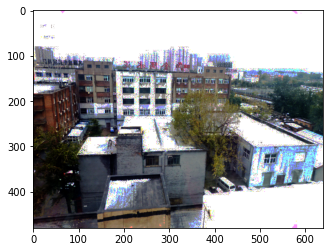

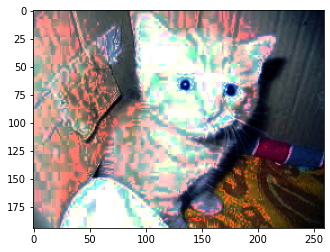

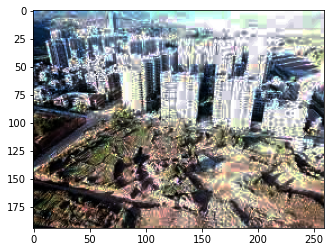

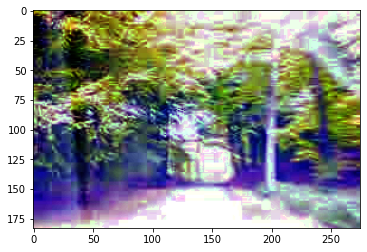

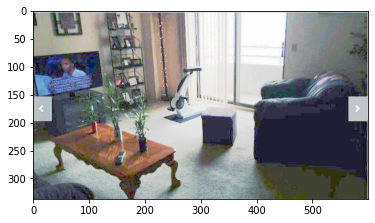

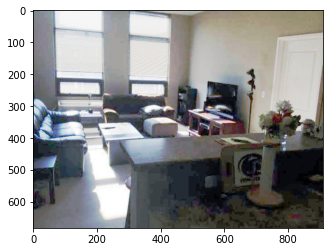

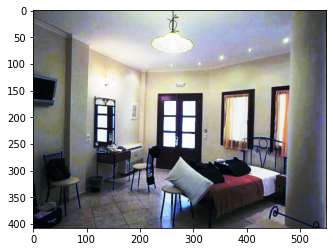

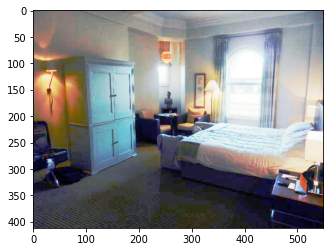

In [8]:
for i in range(1, 9):
    Path = '../images/original images/sample0' + str(i) + '.jpg'
    img = Image.open(Path)
    img2 = RGB_histEqAlgo2(img)
    plt.imshow(img2)
    img2.save("../images/RGB3channel_out/RGB3channel_res" + str(i) + ".jpg")
    plt.show()

## Compare histograms of probability between samples and results

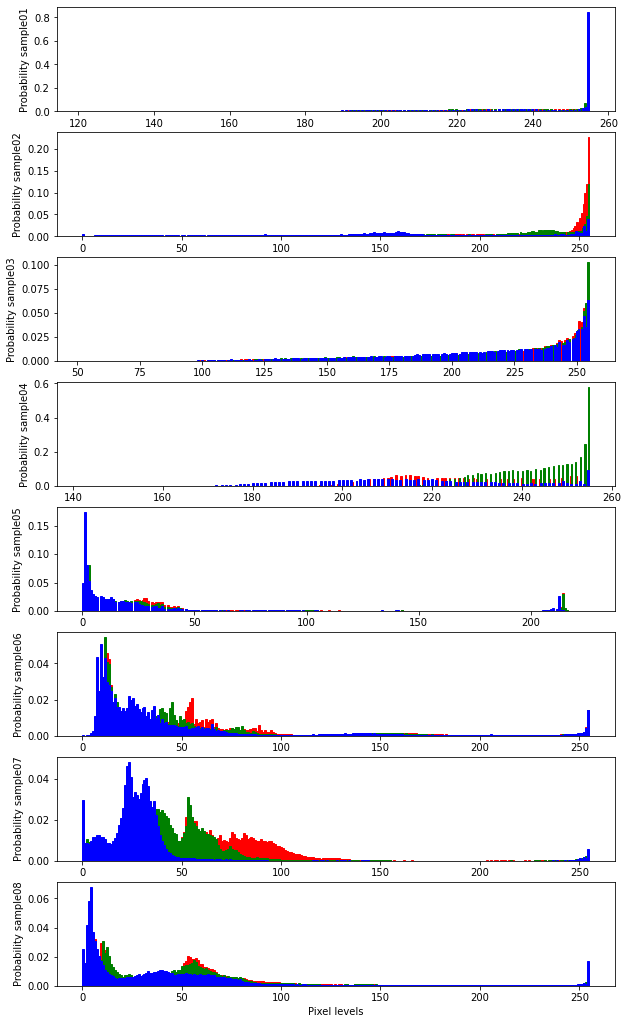

In [9]:
plt.figure(figsize=(10, 18))
for i in range(1, 9):
    plt.subplot(8, 1, i)
    Path = '../images/original images/sample0' + str(i) + '.jpg'
    src = Image.open(Path)
    r, g, b = src.split()
    ar = np.array(r).flatten()
    plt.hist(ar, bins=256, density=True, facecolor='r', edgecolor='r')
    ag = np.array(g).flatten()
    plt.hist(ag, bins=256, density=True, facecolor='g', edgecolor='g')
    ab = np.array(b).flatten()
    plt.hist(ab, bins=256, density=True, facecolor='b', edgecolor='b')
    plt.xlabel("Pixel levels")
    plt.ylabel("Probability sample0" + str(i))
plt.savefig("../samples_histogram.jpg")
plt.show()

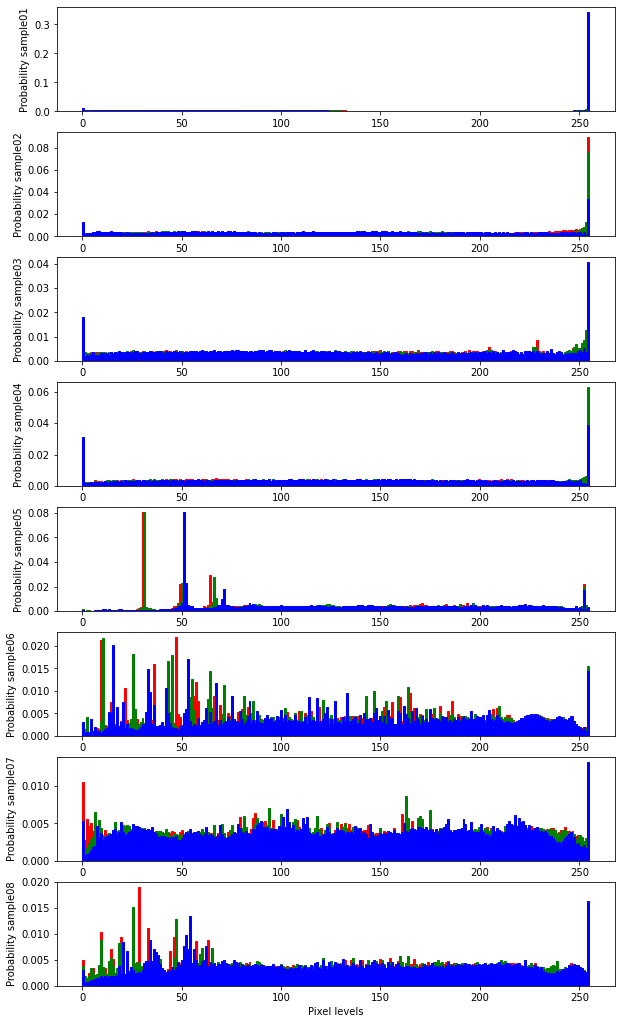

In [10]:
plt.figure(figsize=(10, 18))
for i in range(1, 9):
    plt.subplot(8, 1, i)
    Path = '../images/RGB3channel_out/RGB3channel_res' + str(i) + '.jpg'

    src = Image.open(Path)
    r, g, b = src.split()
    ar = np.array(r).flatten()
    plt.hist(ar, bins=256, density=True, facecolor='r', edgecolor='r')
    ag = np.array(g).flatten()
    plt.hist(ag, bins=256, density=True, facecolor='g', edgecolor='g')
    ab = np.array(b).flatten()
    plt.hist(ab, bins=256, density=True, facecolor='b', edgecolor='b')
    plt.xlabel("Pixel levels")
    plt.ylabel("Probability sample0" + str(i))
plt.savefig("../RGB3channel_HE_samples_histogram.jpg")
plt.show()

# 3 HE algo based on the average of 3 channels

In [11]:
def RGB_histEqAlgo3(imgArr):
    imgArr = np.array(imgArr)
    arrR = imgArr[..., 0]
    arrG = imgArr[..., 1]
    arrB = imgArr[..., 2]

    # extract the average of 3 channels
    imgArr_ave = np.average(imgArr, axis=2)
    hist, bins = np.histogram(imgArr_ave, 255)
    cdf = np.cumsum(hist)
    cdf = 255 * (cdf / cdf[-1])

    resR = np.interp(arrR, bins[:-1], cdf)
    resG = np.interp(arrG, bins[:-1], cdf)
    resB = np.interp(arrB, bins[:-1], cdf)

    new_imgArr = np.zeros(imgArr.shape, dtype="uint8")
    new_imgArr[..., 0] = resR
    new_imgArr[..., 1] = resG
    new_imgArr[..., 2] = resB

    return Image.fromarray(new_imgArr, mode='RGB')

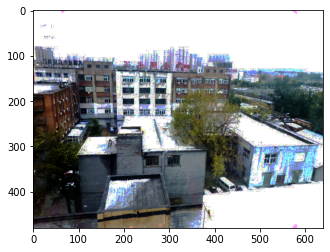

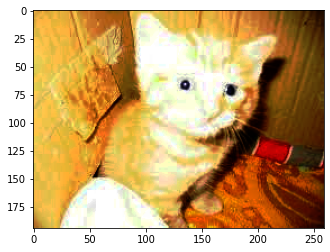

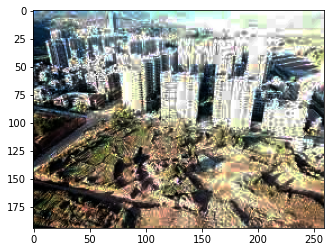

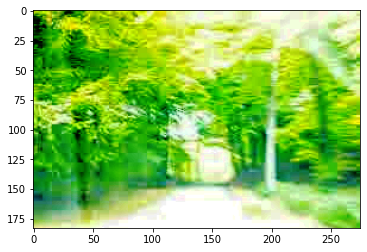

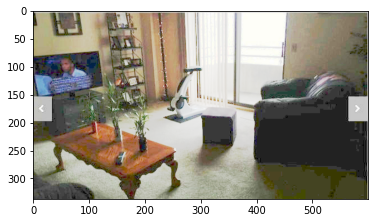

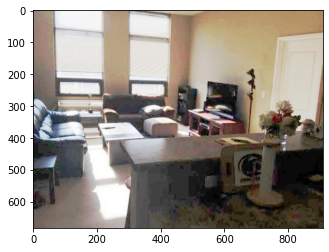

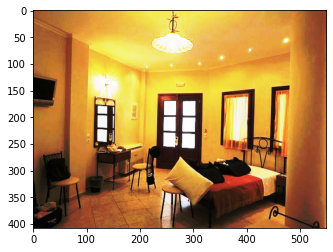

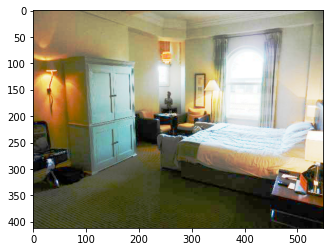

In [12]:
for i in range(1, 9):
    Path = '../images/original images/sample0' + str(i) + '.jpg'
    img = Image.open(Path)
    img2 = RGB_histEqAlgo3(img)
    plt.imshow(img2)
    img2.save("../images/RGB_out/res" + str(i) + ".jpg")
    plt.show()

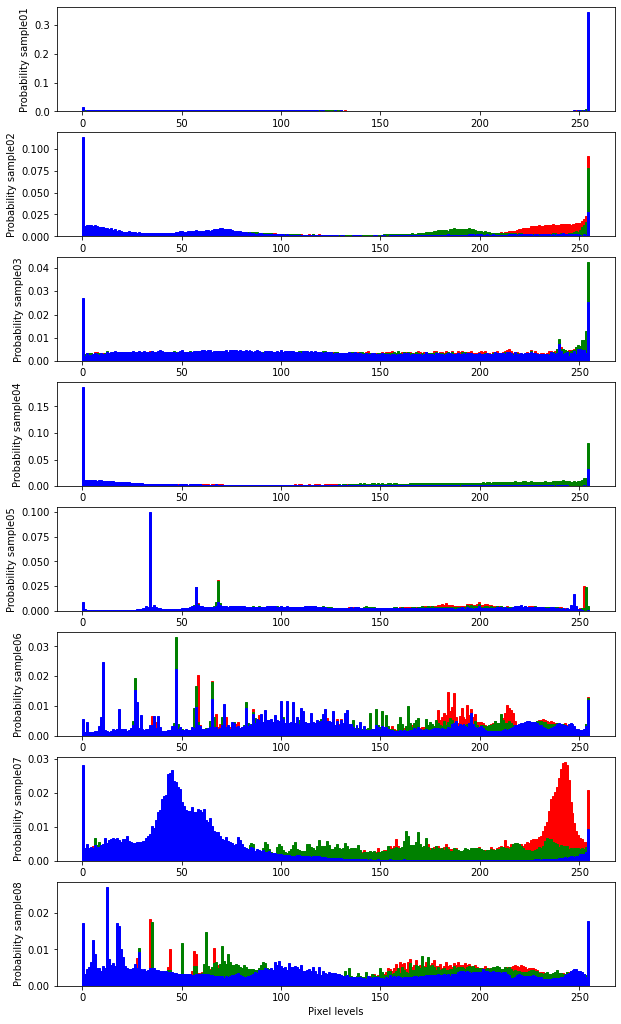

In [13]:
plt.figure(figsize=(10, 18))
for i in range(1, 9):
    plt.subplot(8, 1, i)
    Path = '../images/RGB_out/res' + str(i) + '.jpg'

    src = Image.open(Path)
    r, g, b = src.split()
    ar = np.array(r).flatten()
    plt.hist(ar, bins=256, density=True, facecolor='r', edgecolor='r')
    ag = np.array(g).flatten()
    plt.hist(ag, bins=256, density=True, facecolor='g', edgecolor='g')
    ab = np.array(b).flatten()
    plt.hist(ab, bins=256, density=True, facecolor='b', edgecolor='b')
    plt.xlabel("Pixel levels")
    plt.ylabel("Probability sample0" + str(i))
plt.savefig("../RGB_HE_samples_histogram.jpg")
plt.show()

In [14]:
IMAGES_PATH = r'F:\CV\assignments\Assignments1\images\clahe images\\'
IMAGES_FORMAT = ['.jpg', '.jpeg']
IMAGE_SIZE = 256
IMAGE_ROW = 2
IMAGE_COLUMN = 4
IMAGES_SAVE_PATH = '..\clahe_res.jpg'

# get all iamges' names from the current dir
image_names = [
    name for name in os.listdir(IMAGES_PATH) for item in IMAGES_FORMAT
    if os.path.splitext(name)[1] == item
]
# 简单的对于参数的设定和实际图片集的大小进行数量判断
if len(image_names) != IMAGE_ROW * IMAGE_COLUMN:
    raise ValueError("合成图片的参数和要求的数量不能匹配！")


def images_compose():
    # define the function of images' compositions
    to_image = Image.new(
        'RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE))  # 创建一个新图
    for y in range(1, IMAGE_ROW + 1):
        for x in range(1, IMAGE_COLUMN + 1):
            from_image = Image.open(IMAGES_PATH +
                                    image_names[IMAGE_COLUMN *
                                                (y - 1) + x - 1]).resize(
                                                    (IMAGE_SIZE, IMAGE_SIZE),
                                                    Image.ANTIALIAS)
            to_image.paste(from_image,
                           ((x - 1) * IMAGE_SIZE, (y - 1) * IMAGE_SIZE))
    return to_image.save(IMAGES_SAVE_PATH)


images_compose()

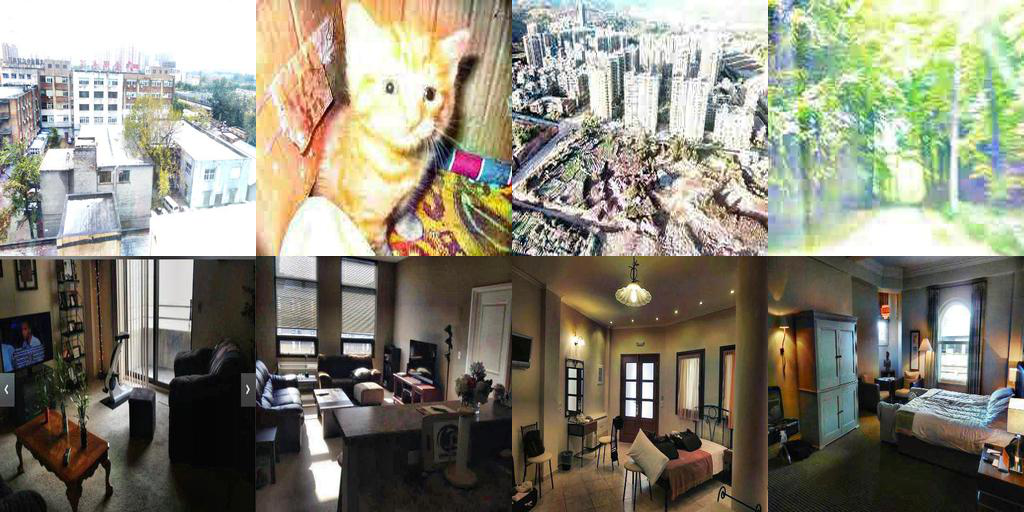

In [15]:
Image.open("../clahe_res.jpg")

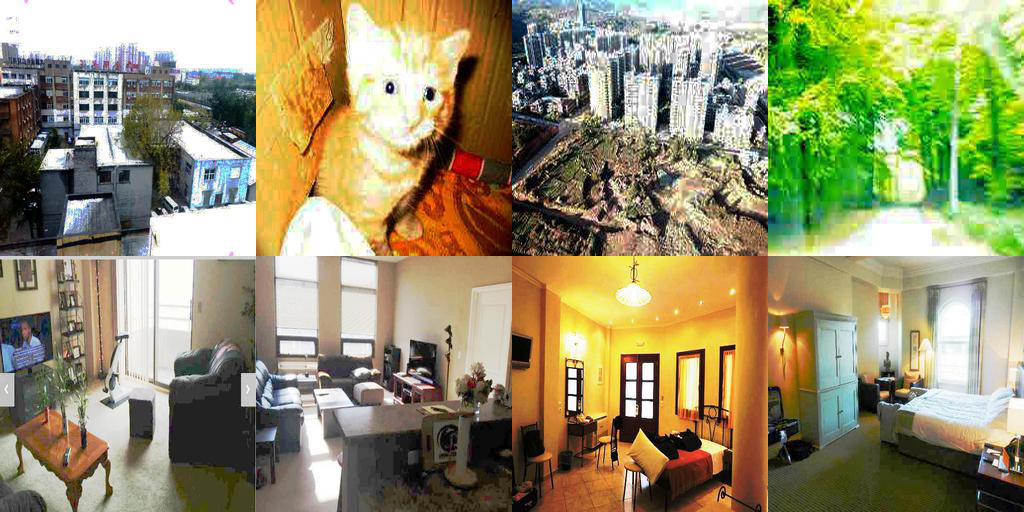

In [16]:
Image.open("../images_compose_res.jpg")

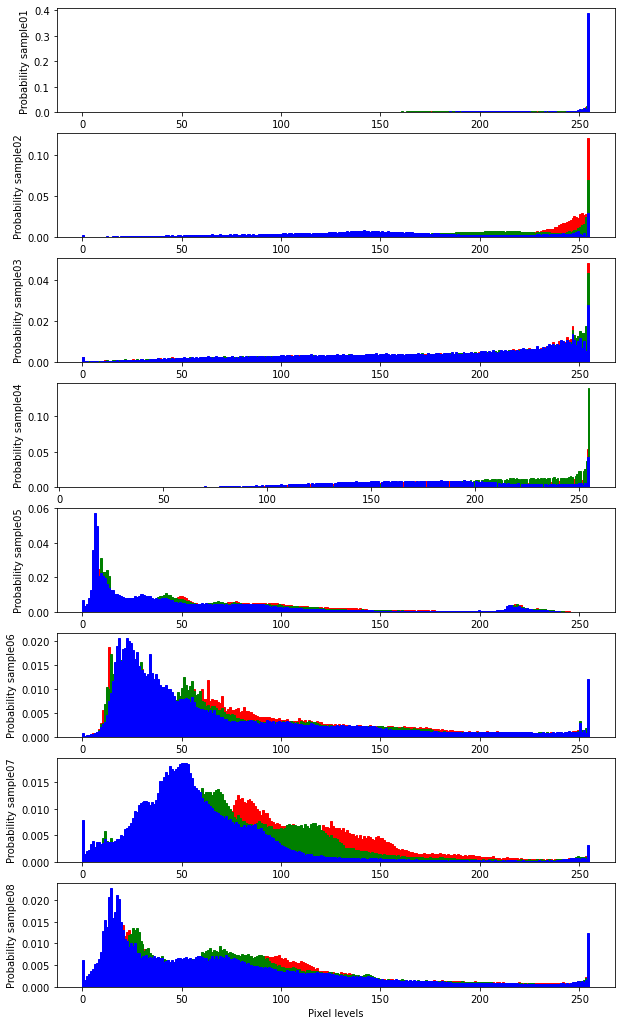

In [17]:
plt.figure(figsize=(10, 18))
for i in range(1, 9):
    plt.subplot(8, 1, i)
    Path = '../images/clahe images/clahe0' + str(i) + '.jpg'

    src = Image.open(Path)
    r, g, b = src.split()
    ar = np.array(r).flatten()
    plt.hist(ar, bins=256, density=True, facecolor='r', edgecolor='r')
    ag = np.array(g).flatten()
    plt.hist(ag, bins=256, density=True, facecolor='g', edgecolor='g')
    ab = np.array(b).flatten()
    plt.hist(ab, bins=256, density=True, facecolor='b', edgecolor='b')
    plt.xlabel("Pixel levels")
    plt.ylabel("Probability sample0" + str(i))
plt.savefig("../CLAHE_samples_histogram.jpg")
plt.show()

NameError: name 'cv' is not defined